# 17기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


In [4]:
df.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [6]:
df.info()
#id 제외 하고 feature의 type은 int형이 5개, float형이 2개, object형이 5개 입니다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [9]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998,4998,4998,4998.000000,4998,4998,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
unique,NaN,1797,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,21,3765,1996,NaN,2102,1758,NaN,NaN,NaN,NaN,NaN
mean,1.003015e+06,NaN,NaN,NaN,8.036815,NaN,NaN,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,NaN,NaN,NaN,6.442697,NaN,NaN,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12039.000000


Gender의 unique값이 2이므로 이를 구해내는 KNN을 만들겠다.

([<matplotlib.patches.Wedge at 0x7fe79251da10>,
 [Text(-0.785842545718456, 0.7697087068097492, 'M'),
  Text(0.7858425457184559, -0.7697087068097493, 'F')])

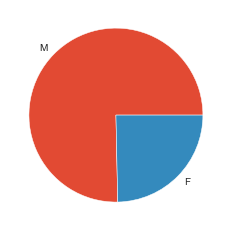

In [13]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Target label 분포
target_label_count = df['Gender'].value_counts()
plt.pie(target_label_count, labels = target_label_count.index)

#Data의 비율이 같지 않고, M의 비율이 3배정도 높다. 따라서 치우쳐진 데이터이다.

<AxesSubplot:>

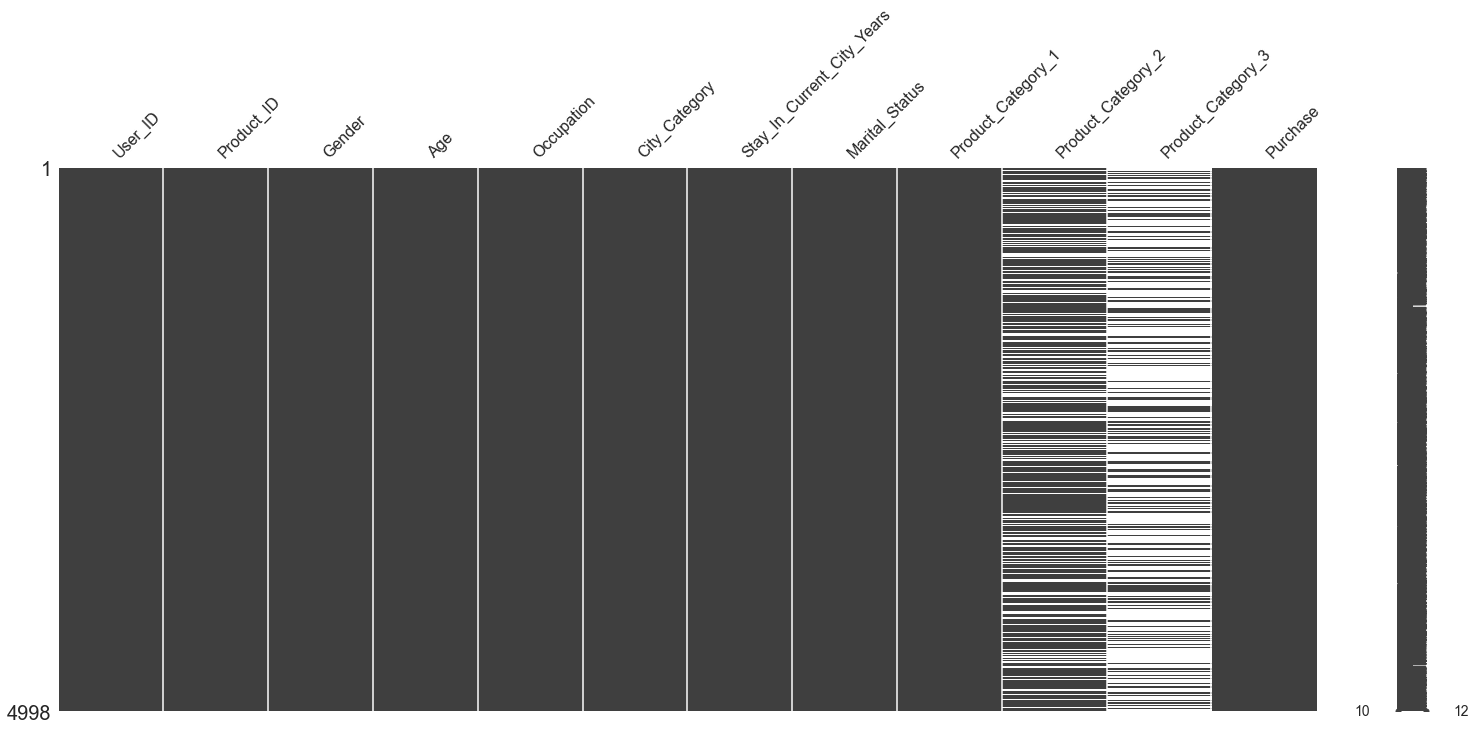

In [15]:
import missingno as msno

msno.matrix(df)

In [21]:
df.isnull().sum()
#Product_Category_2, Product_Category_3 이 둘이 null값이 굉장히 많다는 것을 확인할 수 있다.
#특히 Product_Category_3의 null 값은 3454/4998 약 69%이기 때문에 제거한다.

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

In [24]:
df.drop('Product_Category_3', axis=1, inplace=True)

In [25]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,5780
...,...,...,...,...,...,...,...,...,...,...,...
4993,1000837,P00147942,M,55+,7,C,1,1,1,16.0,11701
4994,1000293,P00358242,M,55+,1,C,1,1,8,NaN,2045
4995,1001908,P00173342,M,55+,13,C,3,1,1,6.0,4505
4996,1005517,P00336742,M,55+,0,C,2,1,12,NaN,1413
